In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

columns = ['uf', 'cidade', 'zona', 'secao', 'cargo', 'candidato', 'votos']
df = pd.read_csv('./out.txt', sep=';', names=columns)


<BarContainer object of 28 artists>

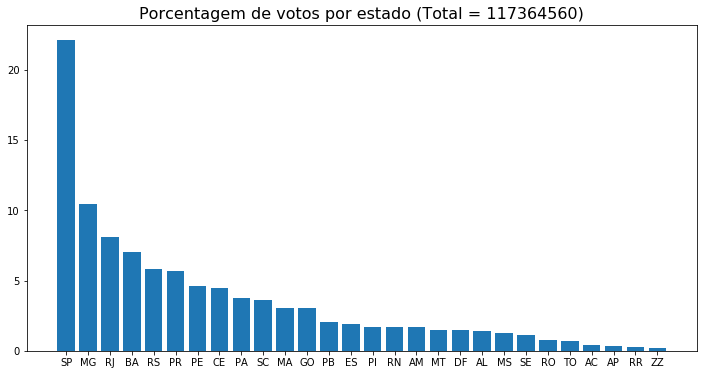

In [18]:
matplotlib.rcParams['figure.figsize'] = [12, 6]
matplotlib.rcParams['axes.titlesize'] = 16

votos_estado = df[df.cargo == 'Presidente'].groupby('uf').sum().sort_values('votos', ascending=False)
total_votos = votos_estado.sum().votos
votos_estado['porcent_votos'] = 100 * votos_estado.votos / total_votos
plt.title("Porcentagem de votos por estado (Total = %s)" % total_votos)
plt.bar(votos_estado.index, votos_estado.porcent_votos)


In [17]:
votos_estado[['votos', 'porcent_votos']]


,votos,porcent_votos
uf,,
SP,25930749,22.094190
MG,12214681,10.407470
RJ,9479580,8.077038
BA,8236847,7.018172
RS,6838548,5.826757
PR,6620465,5.640941
PE,5393186,4.595242
CE,5244712,4.468736
PA,4401798,3.750534


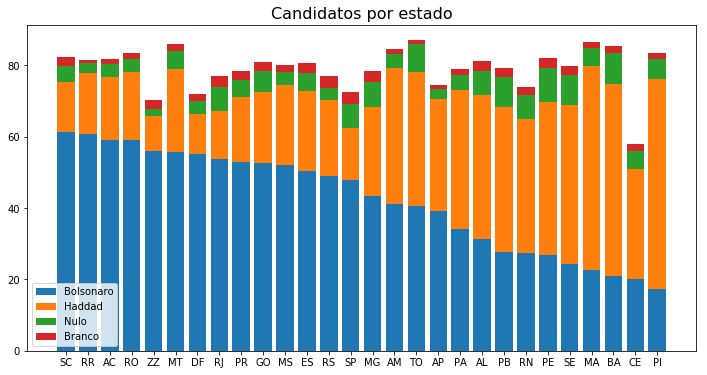

In [63]:
presidente = df[df.cargo == 'Presidente']
t = presidente.groupby('uf').sum()  #.sort_values('votos', ascending=False)
b = presidente[presidente.candidato == 'JAIR BOLSONARO']
h = presidente[presidente.candidato == 'FERNANDO HADDAD']
n = presidente[presidente.candidato == 'Nulo']
r = presidente[presidente.candidato == 'Branco']
b, h, n, r = [_df.groupby('uf').sum() for _df in [b, h, n, r]]
b['bolsonaro'] = b.votos
b['haddad'] = h.votos
b['nulo'] = n.votos
b['branco'] = r.votos
b['total'] = t.votos
b = b[['bolsonaro', 'haddad', 'nulo', 'branco', 'total']]
for k in ['bolsonaro', 'haddad', 'nulo', 'branco']:
    b['porcent_%s' % k] = 100 * b[k] / b.total
b = b.sort_values('porcent_bolsonaro', ascending=False)
# b
plt.title('Candidatos por estado')
pb = plt.bar(b.index, b.porcent_bolsonaro)
ph = plt.bar(b.index, b.porcent_haddad, bottom = b.porcent_bolsonaro)
pn = plt.bar(b.index, b.porcent_nulo, bottom = b.porcent_bolsonaro+b.porcent_haddad)
pr = plt.bar(b.index, b.porcent_branco, bottom = b.porcent_bolsonaro+b.porcent_haddad+b.porcent_nulo)
plt.legend((pb[0], ph[0], pn[0], pr[0]), ('Bolsonaro', 'Haddad', 'Nulo', 'Branco'))

# b

In [58]:
b

,bolsonaro,haddad,nulo,branco,total,porcent_bolsonaro,porcent_haddad,porcent_nulo,porcent_branco
uf,,,,,,,,,
SP,12378012,3833982,1740759,837211,25930749,47.734880,14.785466,6.713107,3.228642
MG,5308047,3037957,845008,381959,12214681,43.456288,24.871358,6.917970,3.127049
RJ,5107735,1255425,653582,282605,9479580,53.881448,13.243466,6.894630,2.981197
BA,1725140,4441955,697750,169806,8236847,20.944179,53.927856,8.471081,2.061541
RS,3353623,1453291,230716,235396,6838548,49.039986,21.251456,3.373757,3.442193
PR,3496448,1210974,308785,165991,6620465,52.812725,18.291374,4.664098,2.507241
PE,1444685,2309104,514413,153557,5393186,26.787227,42.815212,9.538202,2.847241
CE,1061075,1616492,252676,111881,5244712,20.231330,30.821368,4.817729,2.133215
PA,1499294,1714822,188473,70590,4401798,34.060945,38.957308,4.281728,1.603663
